In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bài 1 – Làm quen với ảnh và histogram

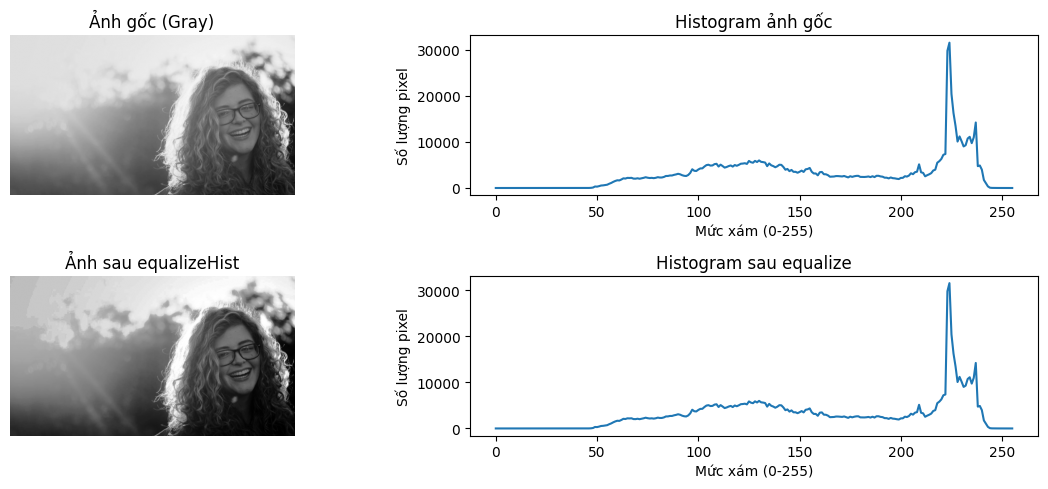

In [3]:

#1: Đọc ảnh và chuyển sang ảnh xám
def read_and_show_image(path):
    # Đọc ảnh màu và chuyển sang ảnh xám
    img_color = cv2.imread(path)
    img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

    return img_color, img_gray

path = "/content/drive/MyDrive/xulyanh/chinh-anh-nguoc-sang-1.jpg"
img_color, img_gray = read_and_show_image(path)
def histogram(img):
    hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
    return hist
img_hist_gray = histogram(img_gray)
# 4) Equalize histogram
img_eq = cv2.equalizeHist(img_gray)
img_hist_eq = histogram(img_eq)
# Hiển thị kết quả
plt.figure(figsize=(12, 5))

# Ảnh gốc xám
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Ảnh gốc (Gray)")
plt.axis('off')

# Histogram ảnh gốc
plt.subplot(2, 2, 2)
plt.plot(img_hist_gray)
plt.title("Histogram ảnh gốc")
plt.xlabel("Mức xám (0-255)")
plt.ylabel("Số lượng pixel")

# Ảnh sau equalize
plt.subplot(2, 2, 3)
plt.imshow(img_eq, cmap='gray')
plt.title("Ảnh sau equalizeHist")
plt.axis('off')

# Histogram sau equalize
plt.subplot(2, 2, 4)
plt.plot(img_hist_eq)
plt.title("Histogram sau equalize")
plt.xlabel("Mức xám (0-255)")
plt.ylabel("Số lượng pixel")

plt.tight_layout()
plt.show()





3) Nhận xét: vùng sáng – vùng tối – độ tương phản ảnh.

Histogram ảnh xám có nhiều đỉnh, phân bố rộng từ mức xám 30 đến 220.
Ảnh có độ sáng trung bình, hơi nghiêng tối nhẹ, nhưng vẫn thể hiện tốt vùng sáng – tối.
Độ tương phản ở mức khá, song chưa đạt cực đại. Khi chuẩn hóa histogram, độ tương phản sẽ được cải thiện rõ rệt.

# Bài 2 – Phân đoạn bằng ngưỡng cố định (Global Thresholding)

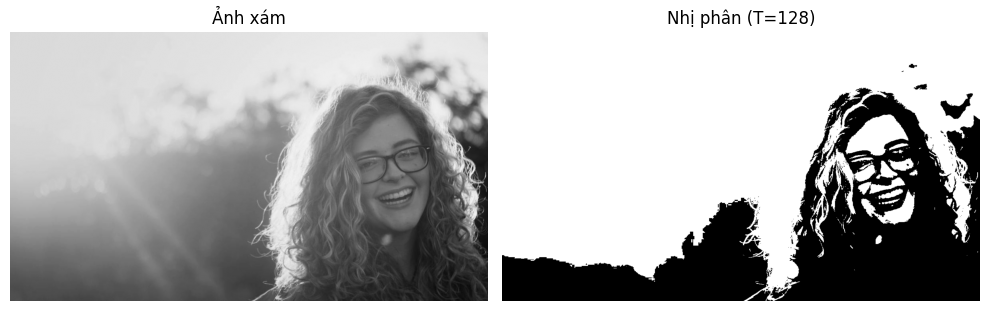

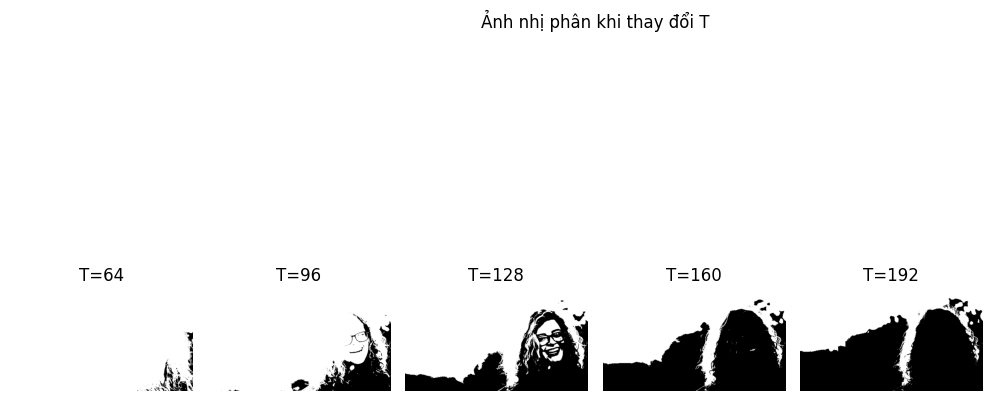

T trung bình (auto) = 166


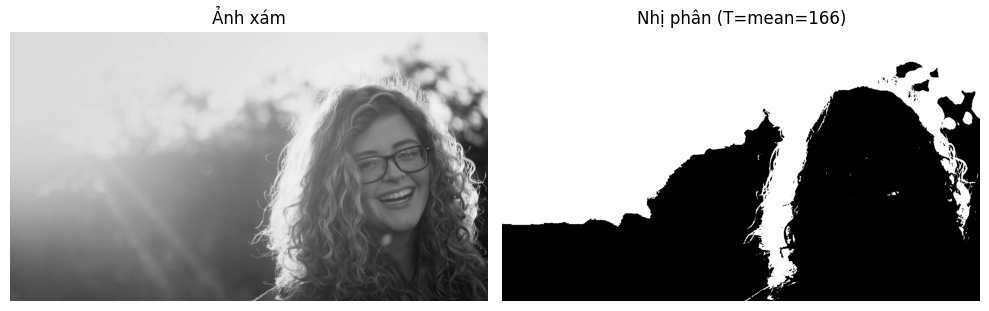

In [4]:
# 1) Đọc ảnh mức xám
path = "/content/drive/MyDrive/xulyanh/chinh-anh-nguoc-sang-1.jpg"
img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# 2) Chọn một giá trị ngưỡng T (ví dụ 128)
T = 128

# 3) Tạo ảnh nhị phân
_, img_bin = cv2.threshold(img_gray, T, 255, cv2.THRESH_BINARY)

# 4) Hiển thị ảnh trước/sau
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_gray, cmap='gray'); plt.title("Ảnh xám"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_bin, cmap='gray'); plt.title(f"Nhị phân (T={T})"); plt.axis('off')
plt.tight_layout(); plt.show()

# 5) Quan sát ảnh khi thay đổi ngưỡng
Ts = [64, 96, 128, 160, 192]
plt.figure(figsize=(12,6))
for i, t in enumerate(Ts, 1):
    _, b = cv2.threshold(img_gray, t, 255, cv2.THRESH_BINARY)
    plt.subplot(1, len(Ts) + 1, i)
    plt.imshow(b, cmap='gray'); plt.title(f"T={t}"); plt.axis('off')
plt.suptitle("Ảnh nhị phân khi thay đổi T", y=1.02)
plt.tight_layout(); plt.show()

#  MỞ RỘNG: T tự động = trung bình độ sáng của ảnh
T_auto = int(np.mean(img_gray))
_, img_bin_auto = cv2.threshold(img_gray, T_auto, 255, cv2.THRESH_BINARY)

print(f"T trung bình (auto) = {T_auto}")
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_gray, cmap='gray'); plt.title("Ảnh xám"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_bin_auto, cmap='gray'); plt.title(f"Nhị phân (T=mean={T_auto})"); plt.axis('off')
plt.tight_layout(); plt.show()


# Bài 3 – Phân đoạn bằng ngưỡng tự động Otsu

Ngưỡng Otsu chọn: 166.00 (so với T cố định = 128)


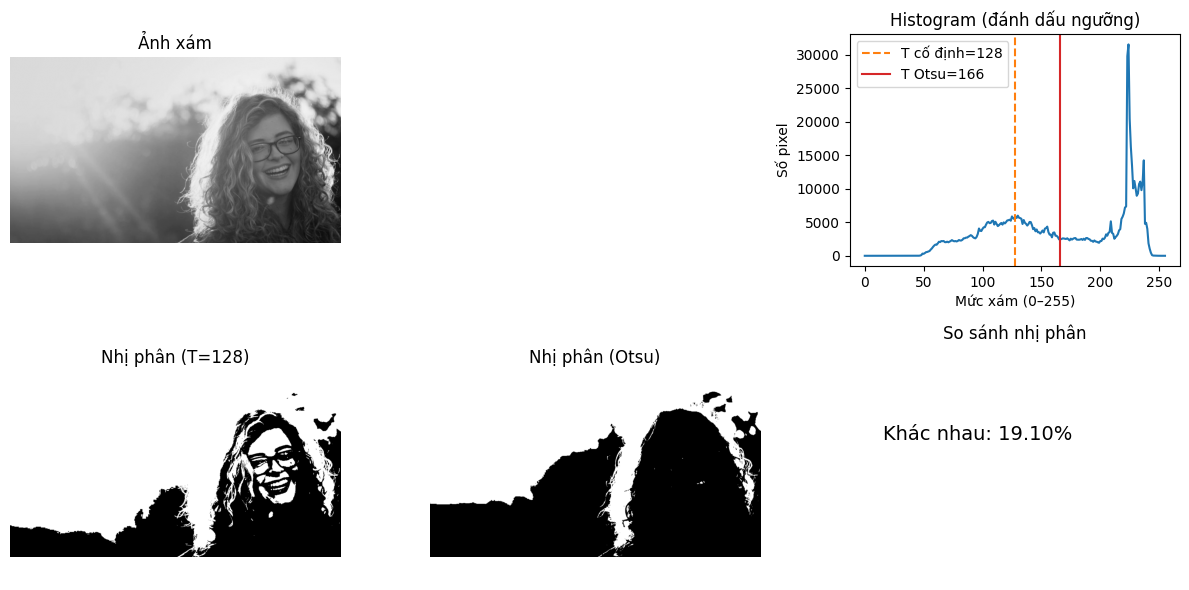

In [5]:
# 1) Đọc ảnh mức xám
path = "/content/drive/MyDrive/xulyanh/chinh-anh-nguoc-sang-1.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# 2) Ngưỡng cố định để so sánh
T_fixed = 128
_, bin_fixed = cv2.threshold(img, T_fixed, 255, cv2.THRESH_BINARY)

# 3) Otsu threshold
# threshold=THRESH_BINARY + THRESH_OTSU
T_otsu, bin_otsu = cv2.threshold(img, 0, 255,
                                 cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(f"Ngưỡng Otsu chọn: {T_otsu:.2f} (so với T cố định = {T_fixed})")

# 4) Vẽ histogram & đánh dấu ngưỡng
hist = cv2.calcHist([img], [0], None, [256], [0,256]).ravel()

plt.figure(figsize=(12,6))
# Ảnh gốc
plt.subplot(2,3,1); plt.imshow(img, cmap='gray'); plt.title("Ảnh xám"); plt.axis('off')

# Histogram + T (cố định)
plt.subplot(2,3,3)
plt.plot(hist); plt.title("Histogram (đánh dấu ngưỡng)")
plt.xlabel("Mức xám (0–255)"); plt.ylabel("Số pixel")
plt.axvline(T_fixed, color='tab:orange', linestyle='--', label=f"T cố định={T_fixed}")
plt.axvline(T_otsu,  color='tab:red',    linestyle='-',  label=f"T Otsu={T_otsu:.0f}")
plt.legend()

# Kết quả phân đoạn
plt.subplot(2,3,4); plt.imshow(bin_fixed, cmap='gray'); plt.title(f"Nhị phân (T={T_fixed})"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(bin_otsu,  cmap='gray'); plt.title("Nhị phân (Otsu)");      plt.axis('off')

# So sánh hiệu năng bằng tỉ lệ điểm khác nhau (tham khảo)
diff_ratio = np.mean((bin_fixed!=bin_otsu).astype(np.uint8))*100
plt.subplot(2,3,6); plt.text(0.1,0.6,f"Khác nhau: {diff_ratio:.2f}%", fontsize=14)
plt.axis('off'); plt.title("So sánh nhị phân")

plt.tight_layout(); plt.show()


# Bài 4 – Phân đoạn bằng ngưỡng thích nghi (Adaptive Thresholding)

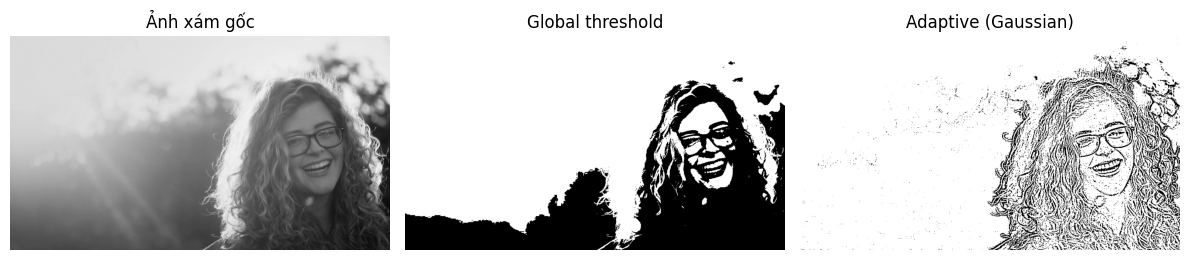

In [6]:
# 1) Đọc ảnh mức xám
path = "/content/drive/MyDrive/xulyanh/chinh-anh-nguoc-sang-1.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# 2) Global threshold để so sánh
T = 128
_, bin_global = cv2.threshold(img, T, 255, cv2.THRESH_BINARY)

# 3) Adaptive threshold (Gaussian)
bin_adapt_gauss = cv2.adaptiveThreshold(
    img, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # tính trung bình có trọng số Gaussian
    cv2.THRESH_BINARY,
    11, 2
)

# 4) Hiển thị kết quả
plt.figure(figsize=(12,7))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Ảnh xám gốc"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(bin_global, cmap='gray'); plt.title("Global threshold"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(bin_adapt_gauss, cmap='gray'); plt.title("Adaptive (Gaussian)"); plt.axis('off')
plt.tight_layout(); plt.show()


Nhận xét

Với ảnh có ánh sáng không đồng đều, global threshold khiến vùng tối bị mất chi tiết hoặc vùng sáng dính nền.
Adaptive threshold (Gaussian) cho kết quả ổn định hơn: biên tách rõ trên cả vùng sáng lẫn tối. Khi tăng blockSize, vùng ngưỡng hóa “mượt” hơn nhưng có thể bỏ qua chi tiết nhỏ; khi tăng C, vùng foreground giảm bớt nhiễu.

# Bài 5 – Phân đoạn bằng phát hiện biên (Edge-based Segmentation)

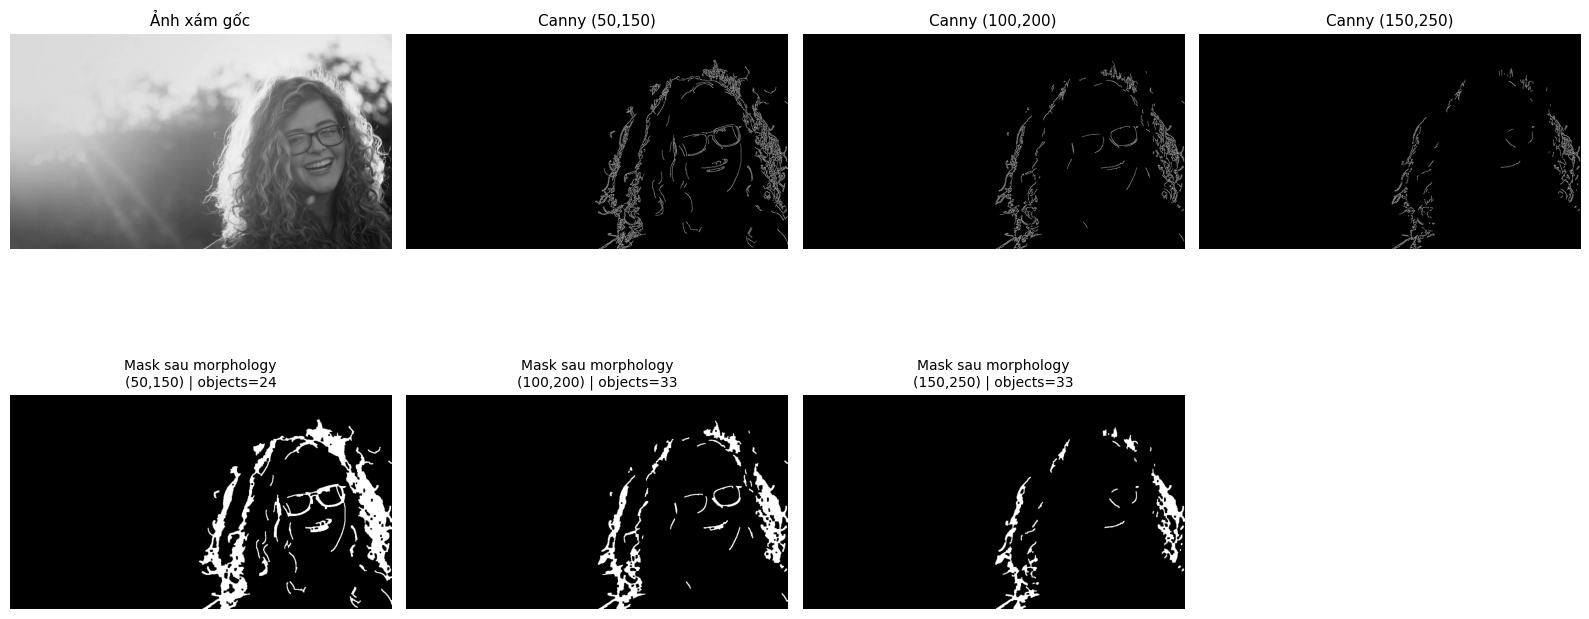

In [12]:
# 1) Đọc ảnh xám
path = "/content/drive/MyDrive/xulyanh/chinh-anh-nguoc-sang-1.jpg"
img  = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


# 2) Canny với các ngưỡng khác nhau
pairs = [(50,150), (100,200), (150,250)]
edges_list = [cv2.Canny(img, t1, t2) for (t1,t2) in pairs]

# 3) Dùng morphological operations (dilate, erode) để làm đầy vùng biên.
kernel = np.ones((3,3), np.uint8)

def edges_to_mask(edges):
    # làm dày biên
    thick = cv2.dilate(edges, kernel, iterations=1)
    # đóng khe hở nhỏ
    closed = cv2.morphologyEx(thick, cv2.MORPH_CLOSE, kernel, iterations=2)
    # chuyển biên (0/255) thành mask nhị phân
    mask = (closed > 0).astype(np.uint8) * 255
    return mask

masks = [edges_to_mask(e) for e in edges_list]

# 4) Đếm số đối tượng bằng findContours
def count_objects(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours, len(contours)

counts = [count_objects(m)[1] for m in masks]

# --- Hiển thị ---
n_edges = len(edges_list)  # số bộ ngưỡng Canny
rows, cols = 2, n_edges + 1  # hàng 1: ảnh gốc + Canny; hàng 2: mask sau morphology

plt.figure(figsize=(4 * cols, 8))

# Ảnh gốc
plt.subplot(rows, cols, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh xám gốc", fontsize=11)
plt.axis('off')

# Hàng 1: các ảnh Canny
for j, (edges, (t1, t2)) in enumerate(zip(edges_list, pairs), start=2):
    plt.subplot(rows, cols, j)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny ({t1},{t2})", fontsize=11)
    plt.axis('off')

# Hàng 2: các ảnh mask sau morphology
for j, (mask, (t1, t2), n) in enumerate(zip(masks, pairs, counts), start=cols + 1):
    plt.subplot(rows, cols, j)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mask sau morphology\n({t1},{t2}) | objects={n}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Bài 6 – Phân đoạn bằng phát triển vùng (Region Growing)

===== KẾT QUẢ REGION GROWING =====
- Toạ độ seed point  : (150, 120)
- Ngưỡng T           : 20
- Số pixel trong vùng: 303861
- Kích thước mask    : (675, 1200)
- Hình chữ nhật bao  : (0, 0, 1200, 638)


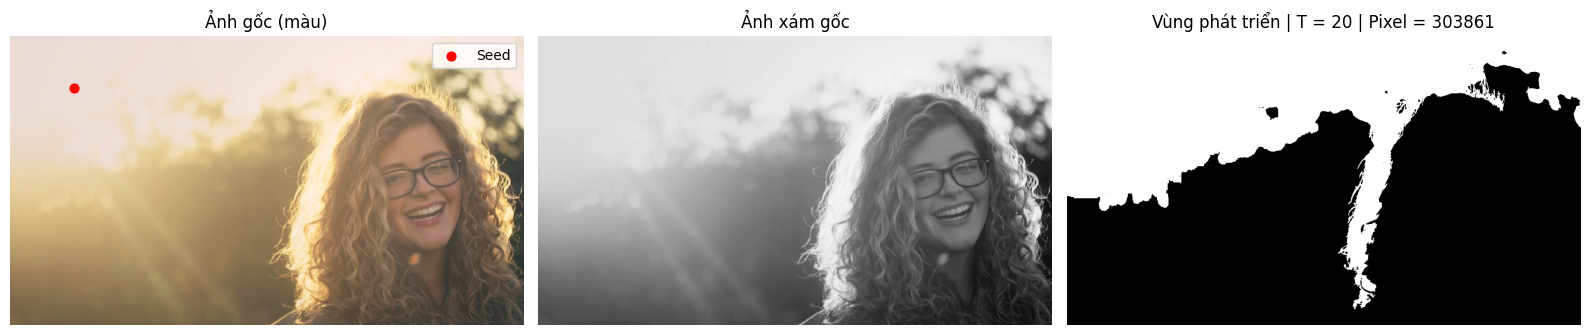

In [13]:
# 1. Đọc ảnh và chuyển sang ảnh xám
path = "/content/drive/MyDrive/xulyanh/chinh-anh-nguoc-sang-1.jpg"
img = cv2.imread(path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#  2. Cấu hình seed point và ngưỡng
seed = (150, 120)   # (x, y)
T = 20              # ngưỡng sai khác

#  3. Chuẩn bị mask và gọi floodFill
h, w = gray.shape
mask = np.zeros((h+2, w+2), np.uint8)
work = gray.copy()

newVal = 255
loDiff = T
upDiff = T
flags = 4 | (newVal << 8) | cv2.FLOODFILL_FIXED_RANGE

num, im, mask_out, rect = cv2.floodFill(
    work, mask, seedPoint=seed, newVal=newVal,
    loDiff=loDiff, upDiff=upDiff, flags=flags
)

region_mask = (work == 255).astype(np.uint8)*255

#  4. In thông tin kết quả
print("===== KẾT QUẢ REGION GROWING =====")
print(f"- Toạ độ seed point  : {seed}")
print(f"- Ngưỡng T           : {T}")
print(f"- Số pixel trong vùng: {num}")
print(f"- Kích thước mask    : {region_mask.shape}")
print(f"- Hình chữ nhật bao  : {rect}")

#  5. Hiển thị kết quả
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc (màu)")
plt.scatter(seed[0], seed[1], color='red', s=40, label='Seed')
plt.legend()
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray')
plt.title("Ảnh xám gốc")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(region_mask, cmap='gray')
plt.title(f"Vùng phát triển | T = {T} | Pixel = {num}")
plt.axis('off')

plt.tight_layout()
plt.show()
